### Первое домашнее задание
#### Буклей Григорий
#### 11/03/2021

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Задание 1. 
По FASTQ файлу определить средний GC-состав ридов и его распределение. Распределение GC состава есть график, на котором по оси x отложен GC состав, а по оси y — его частота, то есть количество ридов с соответствующим составом.


Для улучшения результата было решено 
<ul>
    <li>Не учитывать нуклеотиды с плохим качеством (если $Q_{score} < 35$) </li>
    <li>Не учитывать риды, в которых мало хороших нуклеотидов (если их меньше 10 или трети от общего числа)</li>
</ul>

In [2]:
quality_frequency = [0 for i in range(101)] #array for counting number of reads with the same gc-content

In [3]:
def count_gc_content(sequence, quality): #returns -1 if we do not count this read and the gc-content otherwise
    if len(sequence) < 10:
        return -1
    good_nucleotides = 0
    good_gc_nucleotides = 0
    for i in range(len(sequence)):
        if ord(quality[i]) - 33 > 35: #if read quality of nucleotide is satisfactory
            good_nucleotides += 1
            if sequence[i] in "GC":
                good_gc_nucleotides += 1
    
    if good_nucleotides < 10:
        return -1
    if good_nucleotides * 3 < len(sequence):
        return -1
    
    return int(good_gc_nucleotides * 100 / good_nucleotides)

In [4]:
def plot_gc_content(path):
    f = open(path, 'r')
    quality_frequency = [0 for i in range(101)]


    cnt_line = 0
    name, sequence, quality = "", "", ""
    for line in f:
        if cnt_line % 4 == 0:
            name = line
        elif cnt_line % 4 == 1:
            sequence = line
        elif cnt_line % 4 == 3:
            quality = line

            gc_content = count_gc_content(sequence, quality)
            if gc_content >= 0:
                quality_frequency[gc_content] += 1
        cnt_line += 1
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(quality_frequency, marker = 'o',
            color = 'seagreen')

    plt.show()

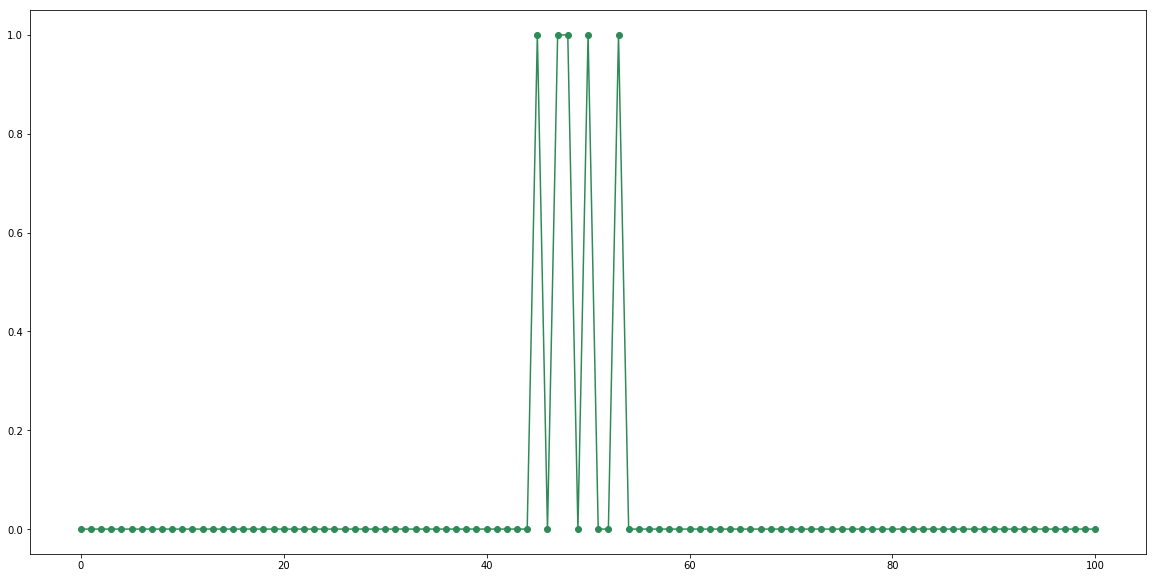

In [5]:
plot_gc_content("./hw1_files/test.fastq")

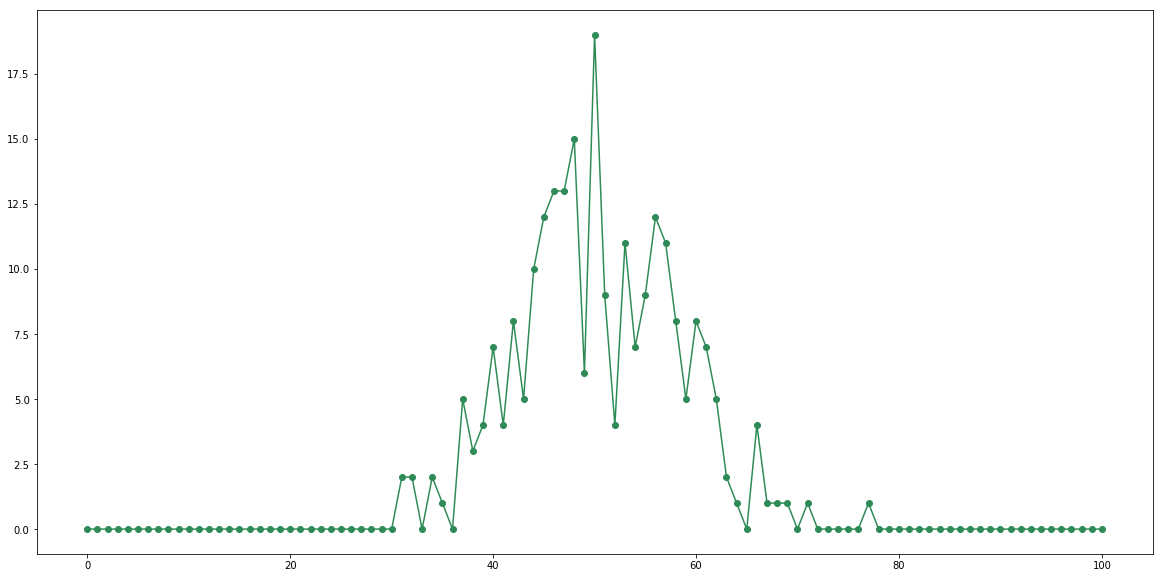

In [6]:
plot_gc_content("./hw1_files/test3.fastq")

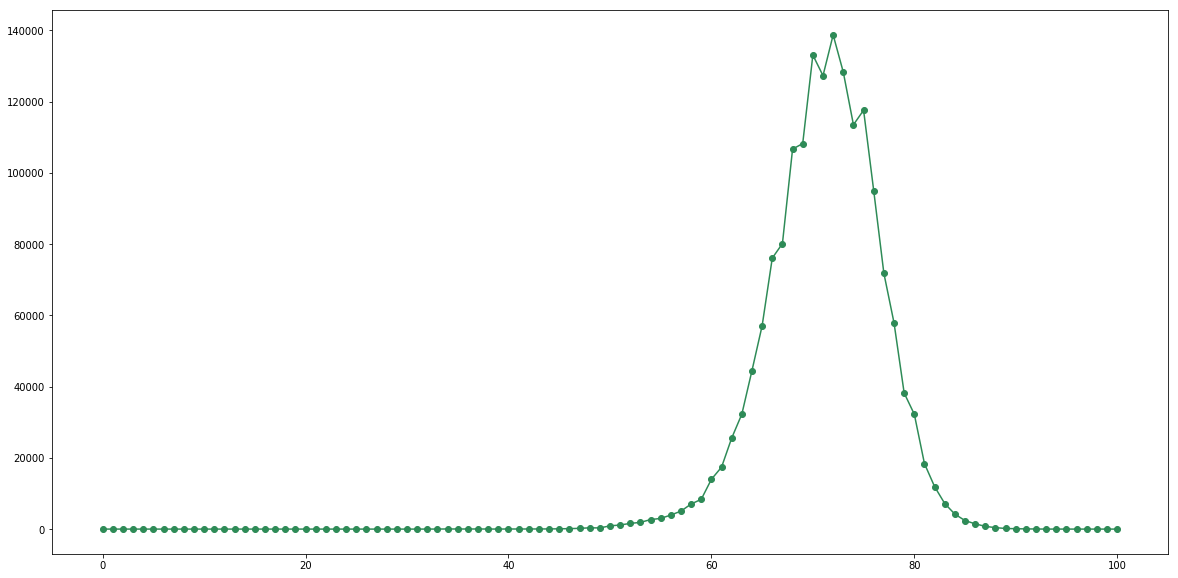

In [7]:
plot_gc_content("./hw1_files/frag.R1.fastq")

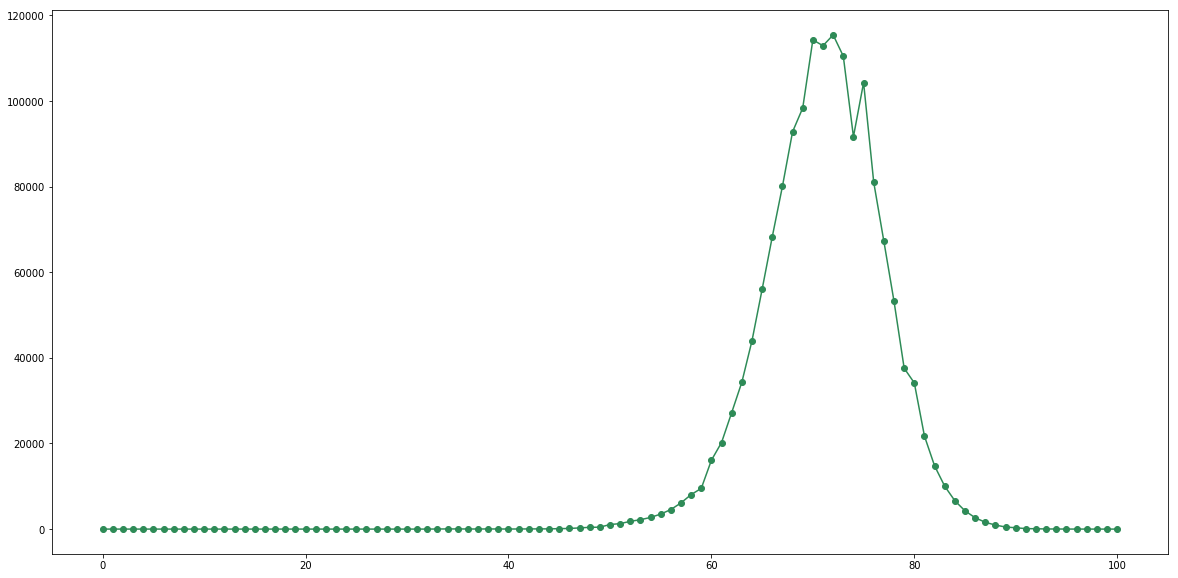

In [8]:
plot_gc_content("./hw1_files/frag.R2.fastq")

Из графиков видно, что распределение стремится к колоколообразному, то есть есть какой-то не очень большой диапазон GC-состава в который мы скорее всего попадём. Но получить что-то меньше 60% или 85% маловероятно

### Задача 2
По FASTQ файлу построить распределение вероятности ошибки в зависимости от позиции нуклеотида.

In [9]:
total_good_qualities = []

In [10]:
def add_to_quality(sequence, quality): #returns -1 if we do not count this read and the gc-content otherwise
    global total_good_qualities
    if total_good_qualities == []:
        total_good_qualities = [0] * len(sequence)
    
    for i in range(len(sequence)):
        if ord(quality[i]) - 33 > 35: #if read quality of nucleotide is satisfactory
            total_good_qualities[i] += 1

In [11]:
def plot_quality(path):
    global total_good_qualities
    f = open(path, 'r')
    total_good_qualities = []
    
    reads_cnt = 0
    cnt_line = 0
    name, sequence, quality = "", "", ""
    
    for line in f:
        if cnt_line % 4 == 0:
            name = line
        elif cnt_line % 4 == 1:
            sequence = line
        elif cnt_line % 4 == 3:
            quality = line
            
            reads_cnt += 1
            add_to_quality(sequence, quality)
            
        cnt_line += 1
    
    total_good_qualities = np.array(total_good_qualities) / reads_cnt
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(total_good_qualities, marker = 'o',
            color = 'seagreen')

    plt.show()

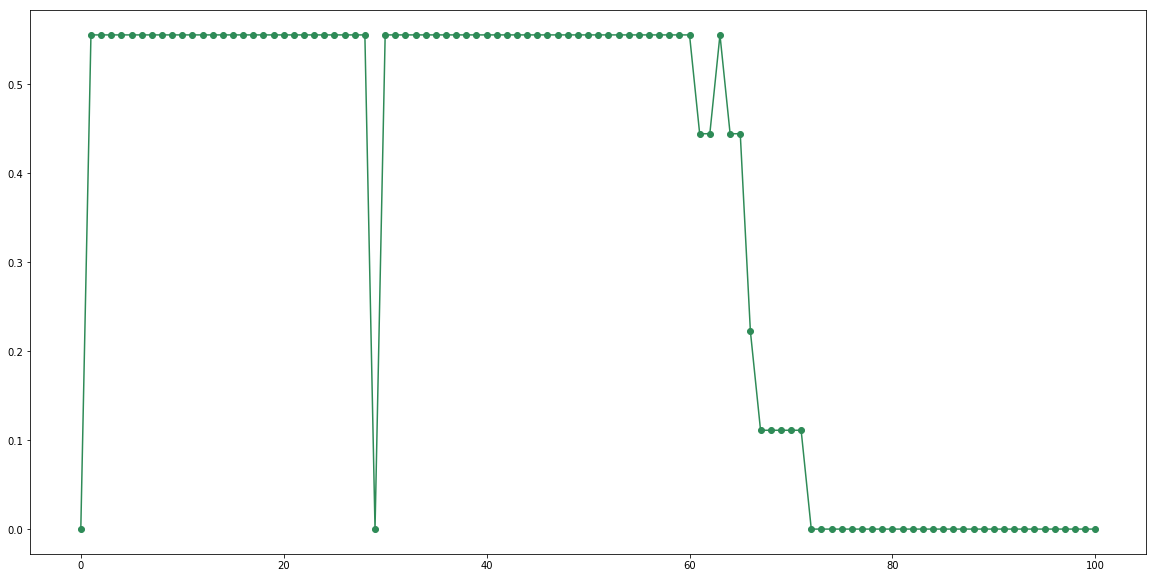

In [12]:
plot_quality("./hw1_files/test.fastq")

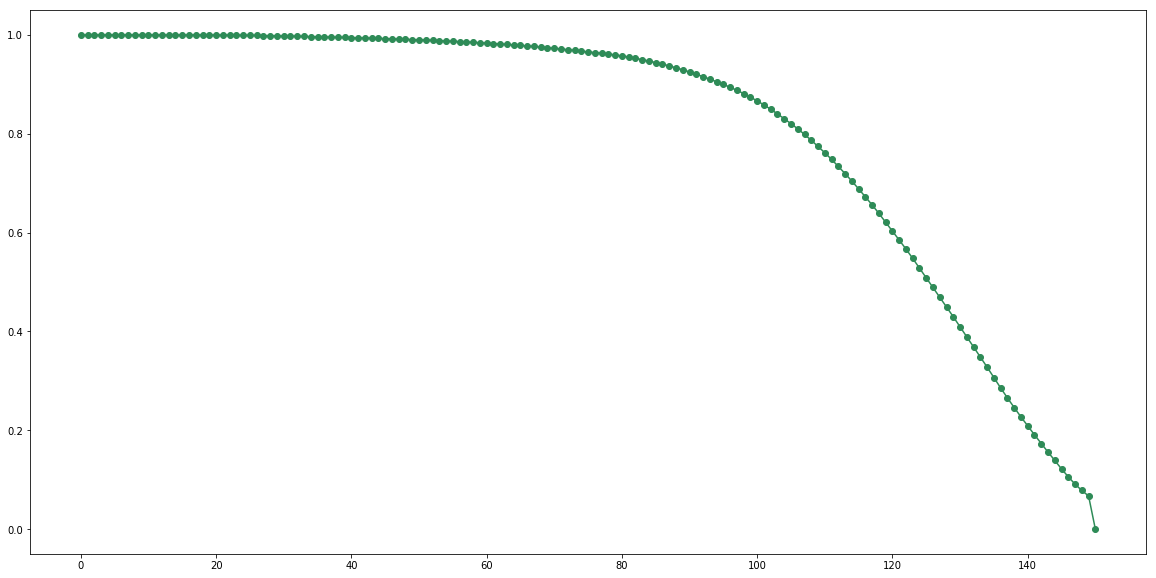

In [13]:
plot_quality("./hw1_files/frag.R1.fastq")

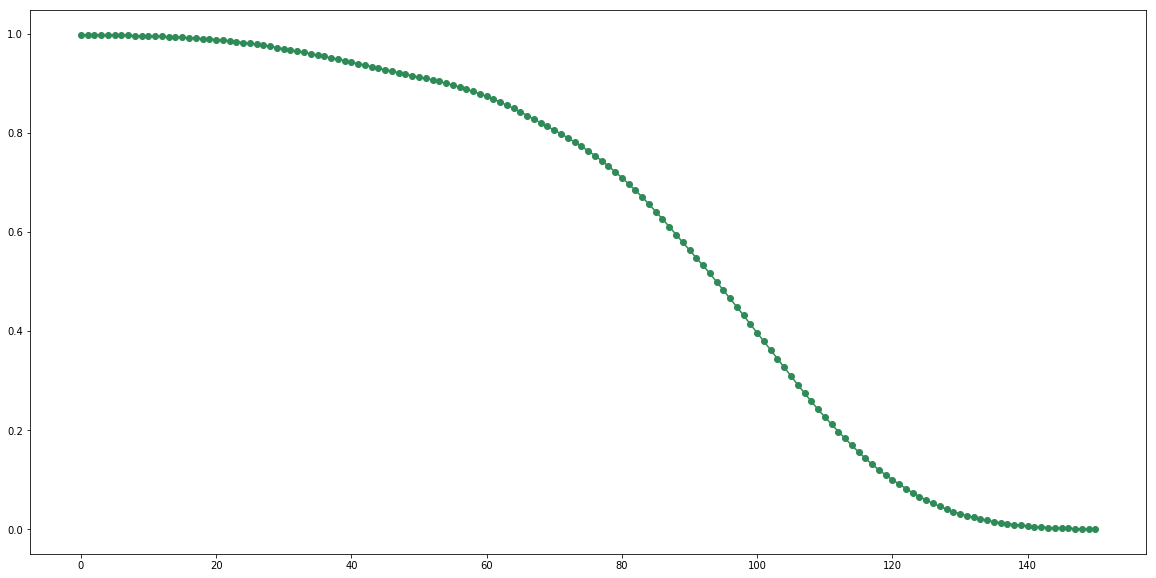

In [14]:
plot_quality("./hw1_files/frag.R2.fastq")

Можно заметить, что качество падает к концу рида.